### Advanced Experimentation: What Test to Use
This exercise adresses the European Social Survey. The data can be found at the following link: <BR\>https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv<BR\><BR\>
The codebook is at this link: <BR\>https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
%matplotlib inline

In [2]:
ess = pd.read_csv('C://Users//fergu//ESSdata_Thinkful.csv')

In [3]:
ess.shape

(8594, 13)

In [4]:
ess['ppltrst'].value_counts(dropna=False)

 5.0     1697
 7.0     1639
 8.0     1299
 6.0     1098
 4.0      767
 3.0      715
 2.0      440
 9.0      337
 0.0      271
 1.0      170
 10.0     147
NaN        14
Name: ppltrst, dtype: int64

In [5]:
ess.isnull().sum()

cntry        0
idno         0
year         0
tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64

In [6]:
ess = ess.dropna()

In [7]:
ess.shape

(8147, 13)

In [8]:
ess.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [9]:
ess.tail()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
8589,SE,3729.0,7,3.0,4.0,5.0,3.0,6.0,6.0,2.0,1.0,18.0,2.0
8590,SE,3732.0,7,5.0,6.0,4.0,4.0,10.0,6.0,3.0,1.0,15.0,2.0
8591,SE,3743.0,7,4.0,5.0,7.0,6.0,8.0,6.0,3.0,1.0,44.0,2.0
8592,SE,3744.0,7,5.0,8.0,8.0,6.0,9.0,7.0,3.0,1.0,15.0,2.0
8593,SE,3746.0,7,2.0,6.0,7.0,5.0,7.0,7.0,4.0,2.0,15.0,2.0


### Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

The plots below show more or less normally-distributed data.

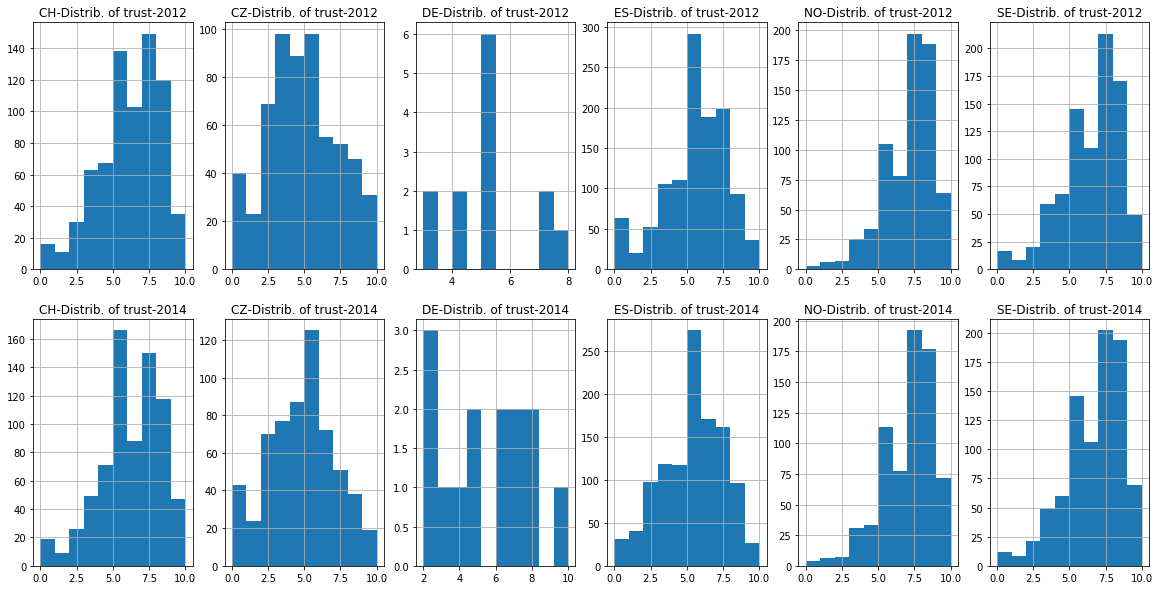

In [10]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
countries = list(ess['cntry'].unique())
years = list(ess['year'].unique())
for year in years:
    for country in countries:
        plt.subplot(len(years),len(countries), countries.index(country) + years.index(year) * len(countries) + 1)
#        print(str(countries.index(country) + years.index(year) * len(countries) + 1))
        ess[(ess['cntry'] == country) & (ess['year'] == year)]['ppltrst'].hist()
        plt.title(str(country) + '-' + 'Distrib. of trust-' + str(2012 + 2*years.index(year)))
plt.show()

In [11]:
results_trust = {'country':countries,
          't-statistic':[],
          'p-value':[]}

In [14]:
for country in countries:
    results_trust['t-statistic'].append(stats.ttest_ind(ess[(ess['cntry'] == country) & (ess['year'] == years[0])]['ppltrst'], 
                                                  ess[(ess['cntry'] == country) & (ess['year'] == years[1])]['ppltrst'])[0])
    results_trust['p-value'].append(stats.ttest_ind(ess[(ess['cntry'] == country) & (ess['year'] == years[0])]['ppltrst'],
                                                  ess[(ess['cntry'] == country) & (ess['year'] == years[1])]['ppltrst'])[1])

In [15]:
cols = ['country', 't-statistic', 'p-value']
pd.DataFrame(results_trust)[cols]

,country,t-statistic,p-value
0,CH,-0.715697,0.474292
1,CZ,0.340754,0.733348
2,DE,-0.346621,0.731776
3,ES,2.100067,0.035832
4,NO,0.511922,0.608785
5,SE,-2.026870,0.042829


In [16]:
spain_trust_12 = np.mean(ess[(ess['year'] == years[0]) & (ess['cntry'] == 'ES')]['ppltrst'])
spain_trust_14 = np.mean(ess[(ess['year'] == years[1]) & (ess['cntry'] == 'ES')]['ppltrst'])
spain_happy_12 = np.mean(ess[(ess['year'] == years[0]) & (ess['cntry'] == 'ES')]['happy'])
spain_happy_14 = np.mean(ess[(ess['year'] == years[1]) & (ess['cntry'] == 'ES')]['happy'])

sweden_trust_12 = np.mean(ess[(ess['year'] == years[0]) & (ess['cntry'] == 'SE')]['ppltrst'])
sweden_trust_14 = np.mean(ess[(ess['year'] == years[1]) & (ess['cntry'] == 'SE')]['ppltrst'])
sweden_happy_12 = np.mean(ess[(ess['year'] == years[0]) & (ess['cntry'] == 'SE')]['happy'])
sweden_happy_14 = np.mean(ess[(ess['year'] == years[1]) & (ess['cntry'] == 'SE')]['happy'])

print('Mean trust in Spain, 2012: ' + str(spain_trust_12))
print('Mean trust in Spain, 2014: ' + str(spain_trust_14))
print('Mean happiness in Spain, 2012: ' + str(spain_happy_12))
print('Mean happiness in Spain, 2014: ' + str(spain_happy_14))

print('Mean trust in Sweden, 2012: ' + str(sweden_trust_12))
print('Mean trust in Sweden, 2014: ' + str(sweden_trust_14))
print('Mean happiness in Sweden, 2012: ' + str(sweden_happy_12))
print('Mean happiness in Sweden, 2014: ' + str(sweden_happy_14))


Mean trust in Spain, 2012: 5.127806563039724
Mean trust in Spain, 2014: 4.940035273368607
Mean happiness in Spain, 2012: 7.557858376511226
Mean happiness in Spain, 2014: 7.450617283950617
Mean trust in Sweden, 2012: 6.043073341094296
Mean trust in Sweden, 2014: 6.239907727797001
Mean happiness in Sweden, 2012: 7.90104772991851
Mean happiness in Sweden, 2014: 7.9388696655132645


### Analysis 
Thus two countries (Spain and Sweden) can be said to have changed in their trust levels to a statistically significant degree. Both of these countries show p-values less than 0.05 for the change in mean trust between 2012 and 2014.

### Did people become happier from 2012 to 2014? Compute results for each country in the sample.

The plots below show more or less normally-distributed data.

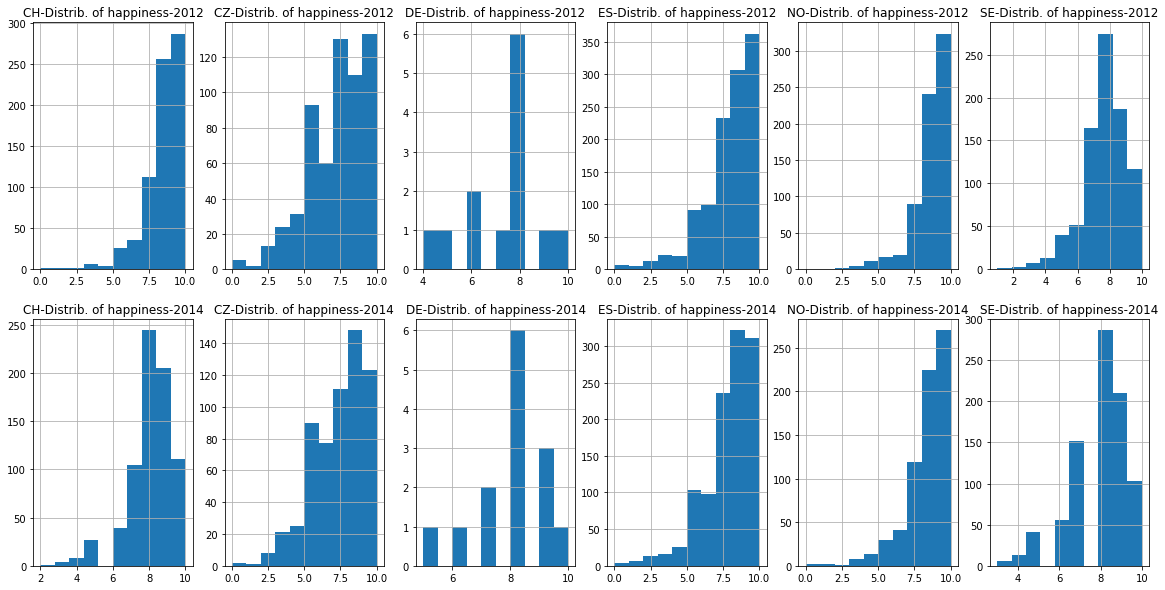

In [17]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
countries = list(ess['cntry'].unique())
years = list(ess['year'].unique())
for year in years:
    for country in countries:
        plt.subplot(len(years),len(countries), countries.index(country) + years.index(year) * len(countries) + 1)
#        print(str(countries.index(country) + years.index(year) * len(countries) + 1))
        ess[(ess['cntry'] == country) & (ess['year'] == year)]['happy'].hist()
        plt.title(str(country) + '-' + 'Distrib. of happiness-' + str(2012 + 2*years.index(year)))
plt.show()

In [18]:
results_happy = {'country':countries,
          't-statistic':[],
          'p-value':[]}

In [19]:
for country in countries:
    results_happy['t-statistic'].append(stats.ttest_ind(ess[(ess['cntry'] == country) & (ess['year'] == years[0])]['happy'], 
                                                  ess[(ess['cntry'] == country) & (ess['year'] == years[1])]['happy'])[0])
    results_happy['p-value'].append(stats.ttest_ind(ess[(ess['cntry'] == country) & (ess['year'] == years[0])]['happy'],
                                                  ess[(ess['cntry'] == country) & (ess['year'] == years[1])]['happy'])[1])

In [20]:
cols = ['country', 't-statistic', 'p-value']
pd.DataFrame(results_happy)[cols]

,country,t-statistic,p-value
0,CH,-0.812142,0.416841
1,CZ,-1.159254,0.246582
2,DE,-0.966318,0.343141
3,ES,1.375059,0.169248
4,NO,4.152957,0.000035
5,SE,-0.537279,0.591144


### Analysis 
Only one country (Norway) changed its happiness level to a statistically significant degree. This change came in the form of a decrease.

In [21]:
norway_happy_12 = np.mean(ess[(ess['year'] == years[0]) & (ess['cntry'] == 'NO')]['happy'])
norway_happy_14 = np.mean(ess[(ess['year'] == years[1]) & (ess['cntry'] == 'NO')]['happy'])

print('Mean happiness in Norway, 2012: ' + str(norway_happy_12))
print('Mean happiness in Norway, 2014: ' + str(norway_happy_14))

Mean happiness in Norway, 2012: 8.252824858757062
Mean happiness in Norway, 2014: 7.919943820224719


### Who reported watching more TV in 2012, men or women?

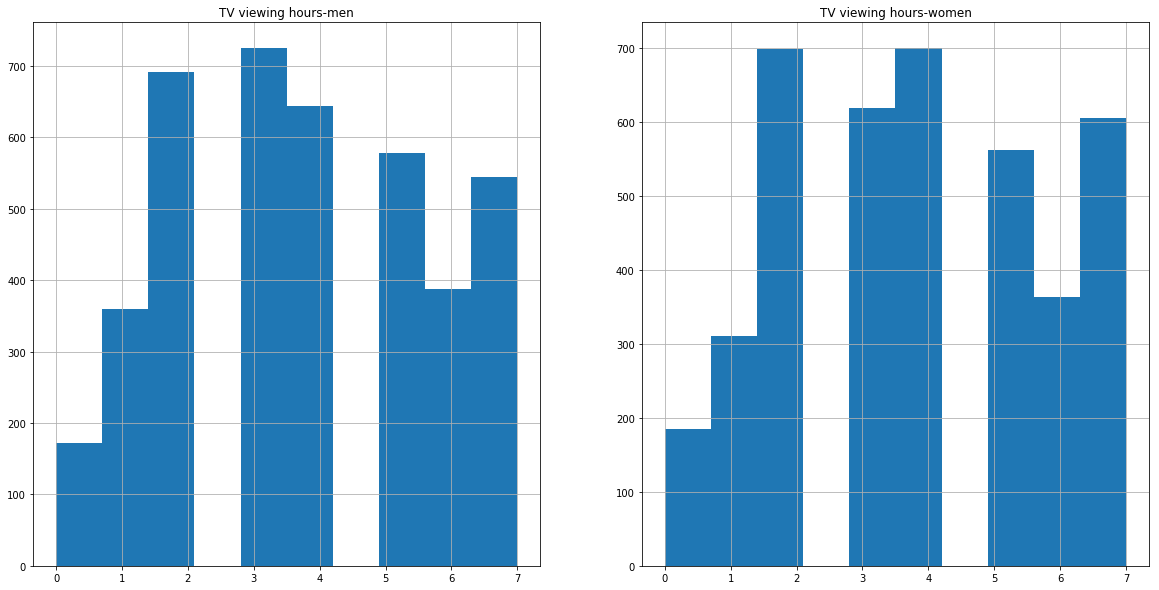

In [22]:
plt.subplot(1,2,1)
ess[ess['gndr'] == 1.0]['tvtot'].hist()
plt.title('TV viewing hours-' + 'men')
plt.subplot(1,2,2)
ess[ess['gndr'] == 2.0]['tvtot'].hist()
plt.title('TV viewing hours-' + 'women')
plt.show()

In [23]:
x = stats.ttest_ind(ess[ess['gndr'] == 1.0]['tvtot'],
                   ess[ess['gndr'] == 2.0]['tvtot'])
print('Men: mean tv viewing hours: ' + str(np.mean(ess[ess['gndr'] == 1.0]['tvtot'])))
print('Women: mean tv viewing hours: ' + str(np.mean(ess[ess['gndr'] == 2.0]['tvtot'])))
print('T-test for TV viewing hours, men vs. women:' + '\n' + str(x))

Men: mean tv viewing hours: 3.7828418230563003
Women: mean tv viewing hours: 3.8548466864490605
T-test for TV viewing hours, men vs. women:
Ttest_indResult(statistic=-1.6176926106407103, pvalue=0.10576758143732026)


Thus we see that women watch more hours of TV than men, but the p-value shows that the difference is not statistically significant.

### Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

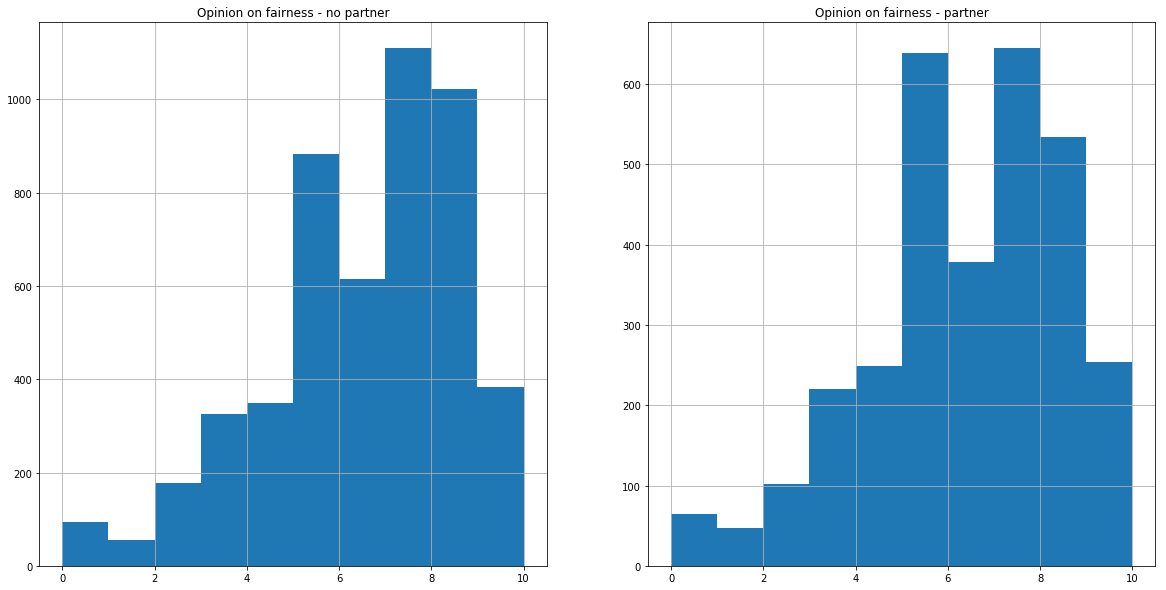

In [24]:
plt.subplot(1,2,1)
ess[ess['partner'] == 1.0]['pplfair'].hist()
plt.title('Opinion on fairness - no partner')
plt.subplot(1,2,2)
ess[ess['partner'] == 2.0]['pplfair'].hist()
plt.title('Opinion on fairness - partner')
plt.show()

In [25]:
x = stats.ttest_ind(ess[ess['partner'] == 1.0]['pplfair'],
                   ess[ess['partner'] == 2.0]['pplfair'])
print('Partner: Opinion on fairness: ' + str(np.mean(ess[ess['partner'] == 1.0]['pplfair'])))
print('No partner: Opinion on fairness: ' + str(np.mean(ess[ess['partner'] == 2.0]['pplfair'])))
print('T-test for opinion on people fairness, no partner vs. partner:' + '\n' + str(x))

Partner: Opinion on fairness: 6.062238180730102
No partner: Opinion on fairness: 5.913848117421825
T-test for opinion on people fairness, no partner vs. partner:
Ttest_indResult(statistic=3.0751595802436618, pvalue=0.0021108684448777081)


So people who live with a partner are statistically more likely to believe that other people try to be  fair, rather than taking advantage of them.

### Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [26]:
countries_b = ['CZ', 'ES', 'NO', 'SE']
subsets = [ess[(ess['cntry'] == country) & (ess['year'] == 7)]['sclmeet'] for country in countries_b]


F, p = stats.f_oneway(subsets[0], subsets[1], subsets[2], subsets[3])

print('F-test value: ' + str(F))
print('p-value: ' + str(p))

F-test value: 60.7198073458
p-value: 3.28201770673e-38


In [27]:
yr_2014_counts = ess[ess['year'] == 7]['cntry'].value_counts()
yr_2014_counts

ES    1134
SE     867
CH     743
NO     712
CZ     606
DE      14
Name: cntry, dtype: int64

In [28]:
values = np.asarray(ess[(ess['year'] == 7) & (ess['cntry'] == 'CZ')]['sclmeet'].tolist() +
                    ess[(ess['year'] == 7) & (ess['cntry'] == 'ES')]['sclmeet'].tolist() +
                    ess[(ess['year'] == 7) & (ess['cntry'] == 'NO')]['sclmeet'].tolist() +
                    ess[(ess['year'] == 7) & (ess['cntry'] == 'SE')]['sclmeet'].tolist()
                    )

countries_list = list(np.repeat('CZ',yr_2014_counts[4])) + list(np.repeat('ES',yr_2014_counts[0])) + list(np.repeat('NO',yr_2014_counts[3])) + list(np.repeat('SE',yr_2014_counts[1]))

tukey = pairwise_tukeyhsd(endog=values,           # Data
                          groups=countries_list,  # Groups
                          alpha=0.05)             # p-value

tukey.summary()

group1,group2,meandiff,lower,upper,reject
CZ,ES,0.7686,0.5866,0.9506,True
CZ,NO,0.8153,0.6155,1.0152,True
CZ,SE,0.9398,0.7483,1.1313,True
ES,NO,0.0467,-0.1262,0.2197,False
ES,SE,0.1712,0.008,0.3343,True
NO,SE,0.1244,-0.0585,0.3074,False


The table above shows which pairs of countries show a stitistically significant difference from each other. The country pairs where the null hypothesis should be rejected are Czech Republic-Spain, Czech Republic-Norway, Czech Republic-Sweden, and Spain-Sweden.

### Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

As can be seen below, the ages are fairly normally distributed:

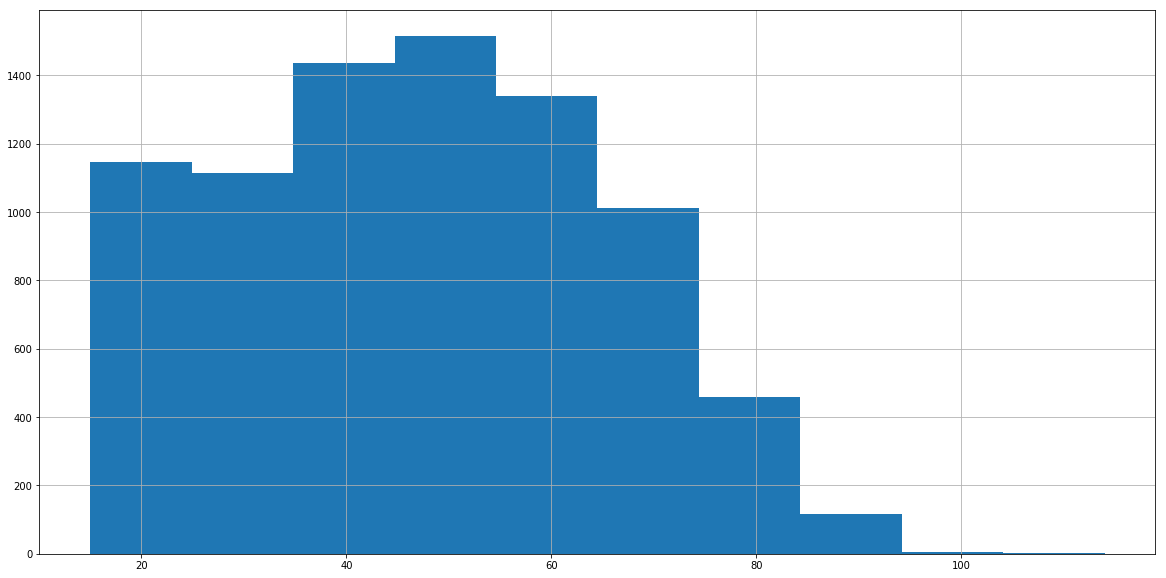

In [30]:
ess['agea'].hist()

In [34]:
sd = np.std(ess['agea'])
sd

18.315766047884196

In [36]:
mn = np.mean(ess['agea'])
mn

47.26218239842887

In [40]:
print('age bounds:', mn - sd, ',', mn + sd)

age bounds: 28.946416350544673 , 65.57794844631306


As a way to stratify the data according to age, we next divide the data into four age-group bands according to a set number of standard deviations from the mean:

In [41]:
ess_lower = ess[ess['agea'] <= mn - sd]
ess_lower_mid = ess[(ess['agea'] > mn - sd) & (ess['agea'] <= mn)]
ess_upper_mid = ess[(ess['agea'] > mn) & (ess['agea'] <= mn + sd)]
ess_upper = ess[ess['agea'] > mn + sd]

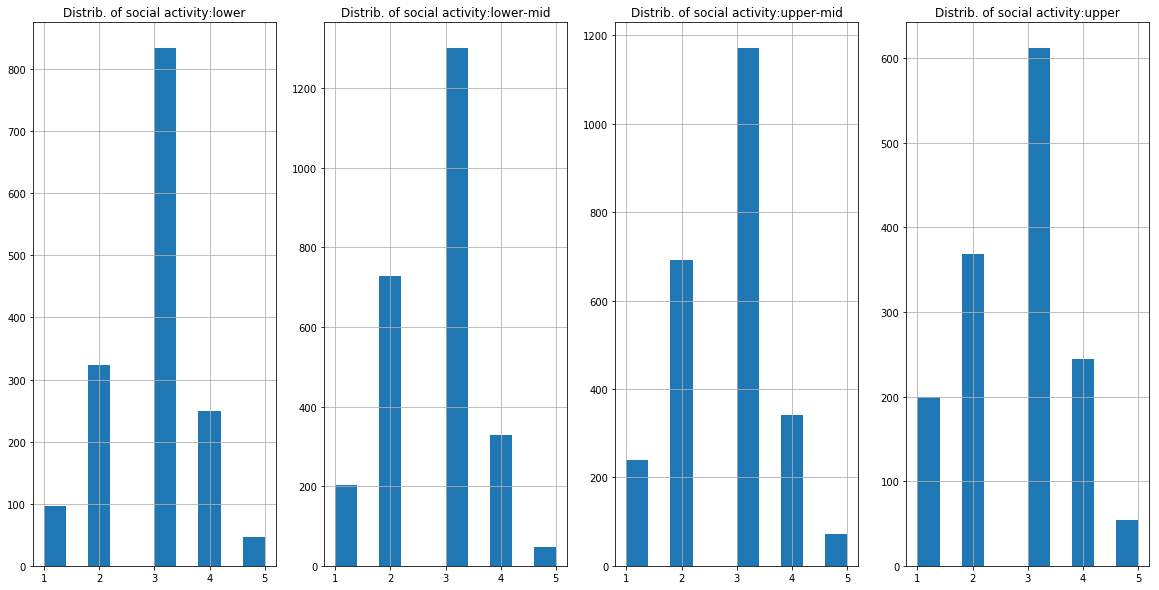

In [71]:
bands = [ess_lower, ess_lower_mid, ess_upper_mid, ess_upper]
titles = ['lower', 'lower-mid', 'upper-mid', 'upper']
for i in range(0, len(bands)):
    plt.subplot(1,4,i+1)
    bands[i]['sclact'].hist()
    plt.title('Distrib. of social activity:' + titles[i])
plt.show()

From the above histograms, we can see that the social activity responses are normally distributed. 

In [72]:
bands = [ess_lower, ess_lower_mid, ess_upper_mid, ess_upper]
countries_b = ['CZ', 'ES', 'NO', 'SE']

In [99]:
def tukey(df):
    subsets = [df[(df['cntry'] == country) & (df['year'] == 7)]['sclact'] for country in countries_b]
    F, p = stats.f_oneway(subsets[0], subsets[1], subsets[2], subsets[3])
    print('F-test value: ' + str(F))
    print('p-value: ' + str(p) + '\n')
    print('-' * 50)
    
    yr_2014_counts = df[df['year'] == 7]['cntry'].value_counts()
    yr_2014_counts
    
    values = np.asarray(df[(df['year'] == 7) & (df['cntry'] == 'CZ')]['sclact'].tolist() +
                    df[(df['year'] == 7) & (df['cntry'] == 'ES')]['sclact'].tolist() +
                    df[(df['year'] == 7) & (df['cntry'] == 'NO')]['sclact'].tolist() +
                    df[(df['year'] == 7) & (df['cntry'] == 'SE')]['sclact'].tolist()
                    )

    countries_list = list(np.repeat('CZ',yr_2014_counts['CZ'])) + list(np.repeat('ES',yr_2014_counts['ES'])) + list(np.repeat('NO',yr_2014_counts['NO'])) + list(np.repeat('SE',yr_2014_counts['SE']))

    tukey = pairwise_tukeyhsd(endog=values,       # Data
                          groups=countries_list,  # Groups
                          alpha=0.05)             # p-value

    display(tukey.summary())

### Analysis
We now calculate, for each age band, a Tukey Honest Significant Differences Test. This shows, for each pair of countries, whether the null hypothesis (that there is no statistically significant difference between the sample means) should be rejected. Only for a few pairs is this the case, all involving Spain and/ or Sweden:

In [100]:
tukey(ess_lower)

F-test value: 2.78909057368
p-value: 0.0398416516803

--------------------------------------------------


group1,group2,meandiff,lower,upper,reject
CZ,ES,-0.2233,-0.4725,0.0258,False
CZ,NO,0.0019,-0.2619,0.2658,False
CZ,SE,-0.0701,-0.3246,0.1845,False
ES,NO,0.2253,-0.0073,0.4579,False
ES,SE,0.1533,-0.0687,0.3753,False
NO,SE,-0.072,-0.3104,0.1664,False


In [101]:
tukey(ess_lower_mid)

F-test value: 5.20163890474
p-value: 0.0014391369744

--------------------------------------------------


group1,group2,meandiff,lower,upper,reject
CZ,ES,0.0453,-0.135,0.2256,False
CZ,NO,0.1659,-0.0368,0.3685,False
CZ,SE,0.2723,0.068,0.4766,True
ES,NO,0.1206,-0.0578,0.299,False
ES,SE,0.227,0.0467,0.4073,True
NO,SE,0.1064,-0.0962,0.3091,False


In [102]:
tukey(ess_upper_mid)

F-test value: 1.87041278613
p-value: 0.132849587654

--------------------------------------------------


group1,group2,meandiff,lower,upper,reject
CZ,ES,-0.0448,-0.246,0.1565,False
CZ,NO,0.1035,-0.1192,0.3261,False
CZ,SE,0.0976,-0.1167,0.3118,False
ES,NO,0.1482,-0.0504,0.3468,False
ES,SE,0.1423,-0.0468,0.3315,False
NO,SE,-0.0059,-0.2177,0.2059,False


In [103]:
tukey(ess_upper)

F-test value: 13.6298797524
p-value: 1.30195800638e-08

--------------------------------------------------


group1,group2,meandiff,lower,upper,reject
CZ,ES,-0.2954,-0.6591,0.0683,False
CZ,NO,0.2596,-0.1315,0.6506,False
CZ,SE,0.2596,-0.1011,0.6203,False
ES,NO,0.5549,0.2659,0.844,True
ES,SE,0.555,0.3085,0.8014,True
NO,SE,0.0,-0.2852,0.2853,False
